<a href="https://colab.research.google.com/github/mcalmeida13/math-machine-learning/blob/main/logistic-regression/linear_regression_l1_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [ ]:
N = 50
D = 50

# uniformly distributed numbers between -5, +5
X = (np.random.random((N, D)) - 0.5)*10

In [ ]:
# true weights - only the first 3 dimensions of X affect Y
true_w = np.array([1, 0.5, -0.5] + [0]*(D - 3))

In [ ]:
# generate Y - add noise with variance 0.5
Y = np.round(sigmoid(X.dot(true_w) + np.random.randn(N)*0.5))

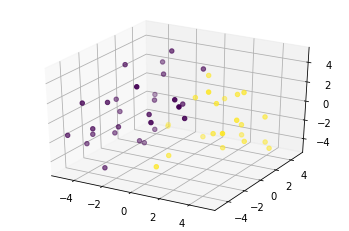

In [ ]:
# let's plot the data to see what it looks like
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=Y)
plt.show()

In [ ]:
# perform gradient descent to find w
costs = [] # keep track of squared error cost
w = np.random.randn(D) / np.sqrt(D) # randomly initialize w
learning_rate = 0.001
l1 = 3.0 # try different values - what effect does it have on w?

In [ ]:
for t in range(5000):
  # update w
  Yhat = sigmoid(X.dot(w))
  delta = Yhat - Y
  w = w - learning_rate*(X.T.dot(delta) + l1*np.sign(w)) #li regularization

  # find and store the cost
  cost = -(Y*np.log(Yhat) + (1-Y)*np.log(1 - Yhat)).mean() + l1*np.abs(w).mean()
  costs.append(cost)

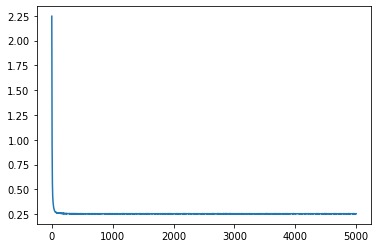

In [ ]:
# plot the costs
plt.plot(costs)
plt.show()

In [ ]:
print("final w:", w)

final w: [ 1.04363592e+00  4.13158840e-01 -4.63329826e-01  3.52060592e-03
 -1.89810390e-03 -4.25779406e-03  6.18110834e-03  8.26020127e-04
 -1.95919901e-03 -3.93153449e-04 -3.12734225e-03 -8.03447784e-04
  1.76590735e-03  1.72580065e-03  1.99093971e-03  1.51732521e-03
  4.41412122e-04  2.94200286e-02  1.68407202e-03  2.37740453e-03
  1.49264187e-04  7.23782839e-04  4.97406548e-03 -2.85581055e-04
  1.81515488e-03  2.33943515e-03 -2.00056012e-03 -1.76903994e-03
 -3.88727764e-03  5.53427238e-03  3.13475926e-03  9.98236038e-02
  2.93445344e-03 -4.45365213e-04  1.67467242e-03  1.84098669e-02
 -2.42927660e-03 -2.52926044e-01 -1.06312549e-02  6.69010394e-04
  4.65506720e-03  1.61831544e-02  1.28373801e-03  1.45811819e-03
 -1.92186631e-03 -2.10481445e-03  2.55694006e-03 -5.95289057e-02
  2.06720008e-03 -7.58161078e-04]


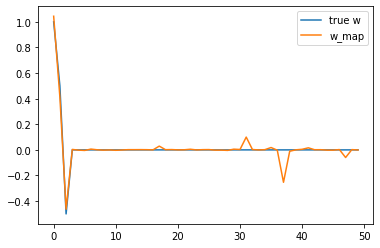

In [ ]:
# plot our w vs true w
plt.plot(true_w, label='true w')
plt.plot(w, label='w_map')
plt.legend()
plt.show()